In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from time import strptime
import datetime
from datetime import datetime
import warnings
import time
import csv
import glob
import logging
import importlib
import json
from tqdm.notebook import tqdm
import sys
sys.path.append('C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/notebook/tweet_utils')
import tweets_utils
# import networkx as nx
import seaborn as sns
# import re
# from operator import itemgetter
# import matplotlib.cm as mcm
# import community
# from community import community_louvain as cm
# import leidenalg as la
# import igraph as ig
# from cdlib import algorithms
warnings.filterwarnings('ignore')
%autosave 3600

Autosaving every 3600 seconds


# Indice

- [Network Script](#script)


- [Network](#network)

    - [Netwrok info](#info)
    - [Load files](#load)
    
    
- [Communities](#communities)

    - [Stats](#stats)    
    - [Rt Disinform Dozen](#rt_dozen)
    - [Disinform Dozen and community](#dozen_comm)
    - [Good Dozen and community](#good_comm)
    - [Top communities](#top_comm)
    - [Community degrees](#degrees_comm)

# Network Script
<a id="script"/>

In [3]:
retweets_graph = nx.from_pandas_edgelist(df,'name','rt_name', create_using=nx.DiGraph())
print(nx.info(retweets_graph)) #da ritornare le info
#-----------------------------------------------------------------
degree_dict = dict(retweets_graph.degree(retweets_graph.nodes()))
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True) #da ritornare il dictionary
#-----------------------------------------------------------------
in_degree_dict = dict(retweets_graph.in_degree(retweets_graph.nodes()))
sorted_in_degree = sorted(in_degree_dict.items(), key=itemgetter(1), reverse=True) #da ritornare il dictionary
#-----------------------------------------------------------------
out_degree_dict = dict(retweets_graph.out_degree(retweets_graph.nodes()))
sorted_out_degree = sorted(out_degree_dict.items(), key=itemgetter(1), reverse=True) #da ritornare il dictionary
#-----------------------------------------------------------------
#### Communities with Louvain modularity
retweets_graph_und = nx.from_pandas_edgelist(df,'name','rt_name')
print(nx.info(retweets_graph_und)) #da ritornare 
#-----------------------------------------------------------------
best_part = cm.best_partition(retweets_graph_und, random_state=42) #da ritornare il best part
#-----------------------------------------------------------------
#### Communities with Leiden (opzionale, se riesci)
tuples = [tuple(x) for x in df_rt.values]
retweets_graph = ig.Graph.TupleList(tuples, directed = True)
n_vertices = retweets_graph.vcount()
print("Number of vertices:", n_vertices)
print("Number of edges:", retweets_graph.ecount())
print("Density of the graph:", 2*retweets_graph.ecount()/(retweets_graph.vcount()*(retweets_graph.vcount()-1)))
#da ritornare
#-----------------------------------------------------------------
total_degree=0
total_indegree = 0
total_outdegree = 0
for n in range(n_vertices):
    total_degree += retweets_graph.degree(n)
    total_indegree += retweets_graph.indegree(n)
    total_outdegree += retweets_graph.outdegree(n)
print("Average indegree:", total_indegree/n_vertices)
print("Average outdegree:", total_outdegree/n_vertices)
#da ritornare
#-----------------------------------------------------------------
partition = la.find_partition(retweets_graph, la.ModularityVertexPartition)
partition
#da ritornare

# Network
<a id="network"/>

### Nx info
<p>
    
    Type: DiGraph
    Number of nodes: 12513502
    Number of edges: 40027282
    Average in degree: 3.1987
    Average out degree: 3.1987
    
</p>
<a id="info"/>


### Load files
<a id="load"/>

In [2]:
path_degrees = glob.glob("F:/Supsi/COVID-19-Tweets/large_files/rt_network/louvain/big_network/*degree*.json")
path_communities = glob.glob("F:/Supsi/COVID-19-Tweets/large_files/rt_network/louvain/big_network/louvain_comm*.json")

In [3]:
start_time = time.perf_counter()
file = open (path_degrees[0],)
degree = json.loads(file.read())
file.close()
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Time:  28.418512899999996


In [4]:
start_time = time.perf_counter()
file = open (path_degrees[1],)
in_degree = json.loads(file.read())
file.close()
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Time:  52.02346729999999


In [6]:
start_time = time.perf_counter()
file = open (path_degrees[2],)
out_degree = json.loads(file.read())
file.close()
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Time:  330.66192780000006


In [9]:
start_time = time.perf_counter()
file = open (path_communities[0],)
leiden = json.loads(file.read())
file.close()
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Time:  1.6485553999999638


In [3]:
start_time = time.perf_counter()
file = open (path_communities[0],)
louvain = json.loads(file.read())
file.close()
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Time:  37.97987


In [25]:
comm = []
name = []

for i in tqdm(louvain):
    if (louvain.get(i) == 1) | (louvain.get(i) == 2):  
        name.append(i)
        comm.append(louvain.get(i))

In [29]:
rt_1 = pd.read_csv(path_nt[0] + "rt_nt_1.csv", low_memory=False, lineterminator="\n")
rt_1

,name,rt_name
0,Paxman42,OurWarOnCancer
1,buysell55555,MerlinofCanada
2,kbplitt,cnnbrk
3,PDerek56,Gizmodo
4,Norberta36,MatthewHilk
...,...,...
7876065,UrbanWitch9,SRuhle
7876066,twodogsing,ASlavitt
7876067,wordbrd,TaraLOGrady
7876068,ashsantacruz,anders_aslund


In [30]:
rt_2 = pd.read_csv(path_nt[0] + "rt_nt_2.csv", low_memory=False, lineterminator="\n")
rt_2

,name,rt_name
0,JustAnotherAme4,cnni
1,HHSRegion8,CDCgov
2,Gambiste1,StocksUnhinged
3,ParkvilleMOm,Reuters
4,wQQn,guardiannews
...,...,...
5953450,Tribble_Bait,awstar11
5953451,PPatrick126,VerbatimHKG
5953452,wildflower_wa,OzraeliAvi
5953453,TTysonToni1,RealMattCouch


In [32]:
rt = rt_1.append(rt_2)
rt = rt.reset_index(drop=True)
rt

,name,rt_name
0,Paxman42,OurWarOnCancer
1,buysell55555,MerlinofCanada
2,kbplitt,cnnbrk
3,PDerek56,Gizmodo
4,Norberta36,MatthewHilk
...,...,...
13829520,Tribble_Bait,awstar11
13829521,PPatrick126,VerbatimHKG
13829522,wildflower_wa,OzraeliAvi
13829523,TTysonToni1,RealMattCouch


In [38]:
users = list(set(rt["name"]))
print(len(users))
users.extend(list(set(rt["rt_name"])))
print(len(users))
users = list(set(users))
print(len(users))

1971854
2461000
2179121


In [39]:
ccdh_rt["user_screen_name"]
good_rt["screen_name"]

In [85]:
df_u

,name
1,scaryslocuda
2,ChristianDMZ
3,CantBeStill
4,tcali75
5,DjRopeADope68
...,...
2179116,YassaminYa
2179117,ROCLocustClub
2179118,MichaelKLeigh
2179119,Darrell87123488


In [96]:
mer = df_u.merge(ccdh_rt, left_on="name", right_on="user_screen_name", how="left")
bad = mer[mer["user_screen_name"].notna()]
mer

,name,Unnamed: 0,user_screen_name
0,scaryslocuda,NaN,NaN
1,ChristianDMZ,NaN,NaN
2,CantBeStill,NaN,NaN
3,tcali75,NaN,NaN
4,DjRopeADope68,NaN,NaN
...,...,...,...
2179115,YassaminYa,NaN,NaN
2179116,ROCLocustClub,NaN,NaN
2179117,MichaelKLeigh,NaN,NaN
2179118,Darrell87123488,NaN,NaN


In [91]:
mer = mer.merge(good_rt, left_on="name", right_on="screen_name", how="left")
good = mer[mer["screen_name"].notna() & mer["user_screen_name"].isna()]
na = mer[mer["screen_name"].isna() & mer["user_screen_name"].isna()]

In [102]:
bad.drop(columns=["Unnamed: 0", "user_screen_name"], inplace=True)
good.drop(columns=["Unnamed: 0", "user_screen_name", "screen_name"], inplace=True)
na.drop(columns=["Unnamed: 0", "user_screen_name", "screen_name"], inplace=True)

In [105]:
na["dozen"]=np.nan
good["dozen"]="good"
bad["dozen"]="bad"

In [109]:
x = na.append(good)
x = x.append(bad)
x = x.reset_index(drop=True)
x

,name,dozen
0,scaryslocuda,NaN
1,ChristianDMZ,NaN
2,CantBeStill,NaN
3,tcali75,NaN
4,DjRopeADope68,NaN
...,...,...
2179115,RedBird74003923,bad
2179116,Warsywarsy,bad
2179117,shrstraker,bad
2179118,aleeta92,bad


In [103]:
print(len(na))
print(len(bad))
print(len(good))
print(len(na) + len(bad) + len(good))
print(len(mer))
print(len(df_u))

1979923
55558
143639
2179120
2179120
2179120


In [111]:
rt.to_csv("C:/Users/gianl/Desktop/Gi/Supsi/user_rt.csv", line_terminator="\n", encoding="utf-8", index=False)

#### write users contained into rt_network

In [26]:
path_nt = glob.glob("F:/Supsi/COVID-19-Tweets/large_files/rt_network/names/")
user_rtuser = pd.read_csv(path_nt[0] + "user_rtuser.csv", low_memory=False, lineterminator="\n")

In [7]:
# communities = [1,2,19]
communities = [5, 14, 15]
for j in communities:
    lst = []
    df_name = pd.DataFrame()
    for i in louvain:
        if(louvain.get(i) == j):
            lst.append(i)
    df_name = pd.DataFrame(lst, columns=['user_screen_name'])
    df_name.to_csv(path_nt[0] + f"names_{j}.csv", index=False, encoding='utf-8', line_terminator='\n')
    print(f"{j} done...")

5 done...
14 done...
15 done...


In [11]:
communities = [5, 14, 15]
for j in communities:
    df_names = pd.read_csv(path_nt[0] + f"names_{j}.csv", low_memory=False, lineterminator="\n")
    names = list(df_names["user_screen_name"])
    new_df = user_rtuser[user_rtuser.name.isin(names)]
    new_df2 = new_df[new_df.rt_name.isin(names)]
    lst_iter_t = tuple(new_df2["name"])
    lst_iter_rt = tuple(new_df2["rt_name"])
    df = pd.DataFrame(list(zip(lst_iter_t, lst_iter_rt)), columns =['name', 'rt_name'])
    df.to_csv(path_nt[0] + f"rt_nt_{j}.csv", line_terminator='\n', encoding='utf-8', index=False)
    print(f"community {j} done ...")

community 5 done ...
community 14 done ...
community 15 done ...


# Communities
<a id="communities"/>

In [4]:
path_ccdh_rt = glob.glob("F:/Supsi/COVID-19-Tweets/large_files/ccdh/")
path_disinform = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/csv/")

In [5]:
ccdh_rt = pd.read_csv(path_ccdh_rt[0] + "rt_bad.csv")
good_rt = pd.read_csv(path_ccdh_rt[0] + "rt_good.csv")

In [20]:
ccdh_rt_flt = ccdh_rt[ccdh_rt.user_screen_name.isin([x for x in louvain])]
good_rt_flt = good_rt[good_rt.screen_name.isin([x for x in louvain])]
ccdh_rt_flt.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
disinform = pd.read_csv(path_disinform[0] + "disinformation_users.csv")
good_dozen = pd.read_csv(path_disinform[0] + "all_good_users.csv")

# Omran

In [25]:

pd.Series(ccdh_rt_w_comm["Communiity"]).value_counts().sort_values(ascending=False)[:20]

2     48402
1      7156
10     3735
0      2782
23     2021
19     1619
5      1600
7      1155
6      1151
11      702
16      557
21      536
32      342
25      284
9       234
48      209
27      199
4       134
14       99
83       96
Name: Communiity, dtype: int64

In [26]:
pd.Series(good_rt_w_comm["Communiity"]).value_counts().sort_values(ascending=False)[:20]

1     113490
2      34942
10     24994
5       7386
19      5203
0       4400
6       2766
16      2495
23      1259
9        961
11       862
7        719
14       540
3        506
27       442
83       426
25       253
30       245
4        196
12       184
Name: Communiity, dtype: int64

In [8]:
names = []
communities = []
for i in tqdm(louvain):
    communities.append(louvain.get(i))5
    names.append(i)
df_network = pd.DataFrame(list(zip(names, communities)), columns=["Name", "Communiity"])
df_network

,Name,Communiity
0,Huerconetzin,0
1,AnneKPIX,1
2,JustAnotherAme4,2
3,cnni,2
4,HHSRegion8,2
...,...,...
12513497,MokeDawg,238
12513498,WallChristie,83
12513499,StopEcocideNL,16
12513500,SueHealy16,120


In [9]:
ccdh_rt_flt["Retweeter"] = ["Bad" for i in range(len(ccdh_rt_flt))]
good_rt_flt["Retweeter"] = ["Good" for i in range(len(good_rt_flt))]

In [10]:
# df_network.sort_values(by=["Communiity"]) 325072

In [11]:
ccdh_rt_w_comm = ccdh_rt_flt.merge(df_network, left_on="user_screen_name", right_on="Name", how="left")
good_rt_w_comm = good_rt_flt.merge(df_network, left_on="screen_name", right_on="Name", how="left")
good_rt_w_comm.rename(columns={"screen_name": "user_screen_name"}, inplace=True)
df_final = ccdh_rt_w_comm.append(good_rt_w_comm)
df_final.reset_index(drop=True, inplace=True)
df_final = df_final[["Name", "Communiity", "Retweeter"]]
df_final.rename(columns={"Communiity": "Comm"}, inplace=True)
df_final

,Name,Comm,Retweeter
0,angrynationalis,2,Bad
1,IFilonczuk,2,Bad
2,CharismaAlasta1,2,Bad
3,Dorunda,2,Bad
4,ajividen73,2,Bad
...,...,...,...
277614,HostofGolden,1,Good
277615,rob_bravo2,1,Good
277616,twentee7,5,Good
277617,ttaryn96,1,Good


In [12]:
keys = good_rt_w_comm.groupby("Communiity")["Name"].count()[:10].keys()
lst_good_value = good_rt_w_comm.groupby("Communiity")["Name"].count()[:10].values
lst_bad_value = ccdh_rt_w_comm.groupby("Communiity")["Name"].count()[:10].values

In [13]:
df_distrib_follower

NameError: name 'df_distrib_follower' is not defined

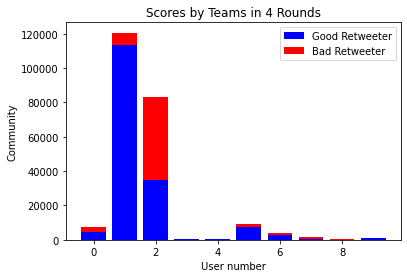

In [37]:
fig, ax = plt.subplots()
c = list(df_distrib_follower["Community"])
g = list(df_distrib_follower["Good"])
b = list(df_distrib_follower["Bad"])

# plot bars in stack manner
plt.bar(c, g, color='blue')
plt.bar(c, b, bottom=g, color='red')
plt.xlabel("User number")
plt.ylabel("Community")
plt.legend(["Good Retweeter", "Bad Retweeter"])
plt.title("Scores by Teams in 4 Rounds")
plt.show()

In [27]:
# 277619 - df_final.groupby("Retweeter","Comm")["Name"].count()[:10].sum
df_distrib_follower = pd.DataFrame(list(zip(keys, lst_good_value, lst_bad_value)), 
                                   columns=["Community", "Good", "Bad"])
df_distrib_follower.sort_values(by=["Good"], ascending=False, inplace=True)
fig = px.bar(df_distrib_follower, x="Community", y=["Good","Bad"], title="Distribution of Users inside communities")
fig.update_layout(legend=dict(
    title="Retweeter"
))
fig.show()

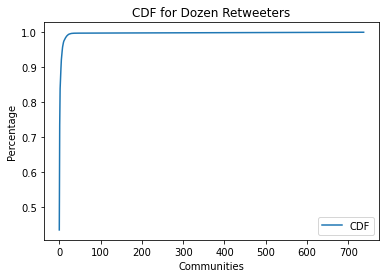

In [15]:
val = df_final["Comm"].value_counts().sort_values(ascending=False)
comm = list(val.keys())
nodes = list(val.values)
x = pd.DataFrame(list(zip(comm,nodes)), columns=["value", "frequency"])
x['pdf'] = x['frequency'] / sum(x['frequency'])
x['cdf'] = x['pdf'].cumsum()
x = x.reset_index()
plt.plot(x["cdf"], label="CDF")
plt.legend()
plt.title("CDF for Dozen Retweeters")
plt.ylabel("Percentage")
plt.xlabel("Communities")
plt.show()

In [20]:
# communities = []
# for i in louvain:
#     communities.append(louvain.get(i))
val = pd.Series(communities).value_counts().sort_values(ascending=False)
comm = list(val.keys())
nodes = list(val.values)
x = pd.DataFrame(list(zip(comm,nodes)), columns=["value", "frequency"])
x['pdf'] = x['frequency'] / sum(x['frequency'])
# CDF
x['cdf'] = x['pdf'].cumsum()
x = x.reset_index()
x

,index,value,frequency,pdf,cdf
0,0,5,1687953,1.348905e-01,0.134891
1,1,0,1516564,1.211942e-01,0.256085
2,2,1,1142470,9.129898e-02,0.347384
3,3,2,1036651,8.284260e-02,0.430226
4,4,11,725867,5.800670e-02,0.488233
...,...,...,...,...,...
325068,325068,149996,1,7.991368e-08,1.000000
325069,325069,201776,1,7.991368e-08,1.000000
325070,325070,265075,1,7.991368e-08,1.000000
325071,325071,129966,1,7.991368e-08,1.000000


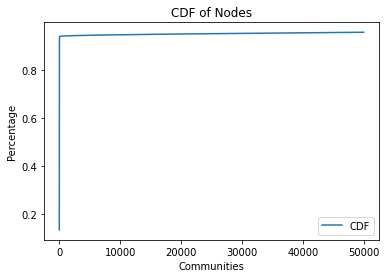

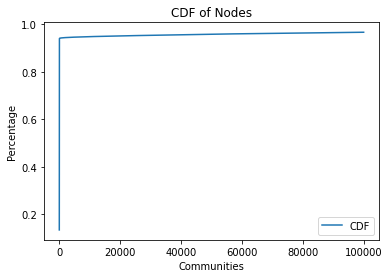

In [31]:
plt.plot(x["cdf"][:50000], label="CDF")
plt.legend()
plt.title("CDF of Nodes")
plt.ylabel("Percentage")
plt.xlabel("Communities")
plt.show()
plt.plot(x["cdf"][:100000], label="CDF")
plt.legend()
plt.title("CDF of Nodes")
plt.ylabel("Percentage")
plt.xlabel("Communities")
plt.show()

### Stats
<a id="stats"/>

In [12]:
ccdh_flt = disinform[disinform.screen_name.isin([x for x in louvain])]
good_flt = good_dozen[good_dozen.screen_name.isin([x for x in louvain])]
# ccdh_flt
# good_flt

# Dove si collocano i Good Users?

In [16]:
cont = 0
co = []
for i in tqdm(louvain):
    if i in list(good_dozen["screen_name"]):
        cont = cont + 1
        co.append(louvain.get(i))

  0%|          | 0/12513502 [00:00<?, ?it/s]

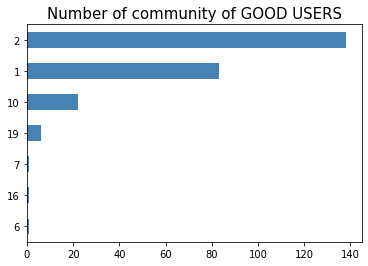

In [22]:
x=pd.Series(co).value_counts().sort_values(ascending=False)
ax = x[:10].plot(kind='barh', color='steelblue') #orange #lightseagreen
ax.set_title('Number of community of GOOD USERS', fontsize=15)
ax.invert_yaxis()

### Rt Disinform Dozen
<a id="rt_dozen"/>

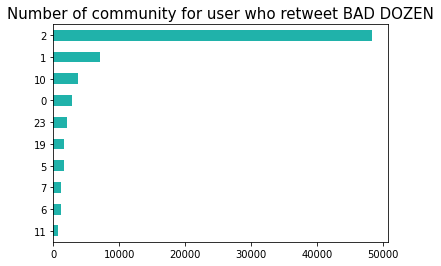

In [24]:
community = []
name = []
rt = []
for i in ccdh_rt_flt["user_screen_name"]:
    if i in louvain:
        rt.append((i, louvain.get(i)))
for i in range(len(rt)):
    community.append(rt[i][1])
val = pd.Series(community)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:10].plot(kind='barh', color='lightseagreen') #orange #lightseagreen
ax.set_title('Number of community for user who retweet BAD DOZEN', fontsize=15)
ax.invert_yaxis()
plt.show()

In [25]:
x = val[:3]
s1 = val[:10]

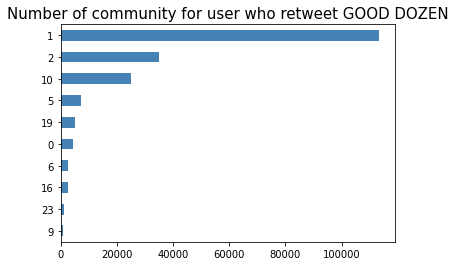

In [26]:
community = []
name = []
rt = []
for i in good_rt_flt["screen_name"]:
    if i in louvain:
        rt.append((i, louvain.get(i)))
for i in range(len(rt)):
    community.append(rt[i][1])
val = pd.Series(community)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:10].plot(kind='barh', color='steelblue') #orange #lightseagreen
ax.set_title('Number of community for user who retweet GOOD DOZEN', fontsize=15)
ax.invert_yaxis()
plt.show()

In [28]:
s2 = val[:10]
tweets_utils.plot_two_hist(s2, s1, "Follower of Dozen")

In [36]:
y = val[:3]
y_v = list(y.values)
y_k = list(y.keys())
x_v = list(x.values)
x_k = list(x.keys())
label_g = ["Good", "Good", "Good"]
label_b = ["Bad", "Bad", "Bad"]
df_plot = pd.DataFrame({'Value':y_v, "Community":y_k, "Dozen":label_g})
df_plot = df_plot.append(pd.DataFrame({'Value':x_v, "Community":x_k, "Dozen": label_b}))

In [37]:
df_plot

,Value,Community,Dozen
0,24427,1,Good
1,8240,2,Good
2,2088,10,Good
0,48402,2,Bad
1,7156,1,Bad
2,3735,10,Bad


In [41]:
fig = px.bar(df_plot, x="Community", y="Value", color="Dozen", barmode='group', title="Comparison of communities of interactions with Good and Bad Dozen (Top 3)")
fig.update_xaxes(type='category')
fig.show()

### Disinform Dozen and community
<a id="dozen_comm"/>

In [20]:
for i in louvain:
    if i in list(disinform["screen_name"]):
        print(f"Name: {i}, Community: {louvain.get(i)}")

Name: unhealthytruth, Community: 2
Name: BusyDrT, Community: 2
Name: RobertKennedyJr, Community: 2
Name: mercola, Community: 2
Name: kevdjenkins1, Community: 2
Name: DrChrisNorthrup, Community: 2
Name: DrButtar, Community: 2


### Good Dozen and community
<a id="good_comm"/>


In [35]:
for i in louvain:
    if i in list(good_dozen["screen_name"]):
        print(f"Name: {i}, Community: {louvain.get(i)}")

### Top communities
<a id="top_comm"/>

In [11]:
val[:10]

5     1687953
0     1516564
1     1142470
2     1036651
11     725867
10     703335
6      685690
14     612418
19     607295
9      585305
dtype: int64

In [4]:
communities = []
for i in louvain:
    communities.append(louvain.get(i))
val = pd.Series(communities).value_counts().sort_values(ascending=False)

In [9]:
total = 0
total2 = 0
for i in val[:10]:
    total = total + i
print(f"Le prime 10 community contengono il {round(total/len(louvain)*100,2)}% degli utenti su {len(pd.Series(communities).unique())} communities")

Le prime 10 community contengono il 74.35% degli utenti su 325073 communities


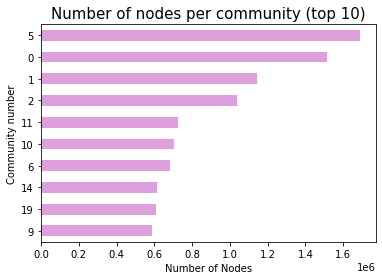

In [7]:
fig = plt.figure() #figsize=(14, 8)
ax = val[:10].plot(kind='barh', color='plum', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of nodes per community (top 10)', fontsize=15)
ax.invert_yaxis()
ax.set_ylabel("Community number")
ax.set_xlabel("Number of Nodes")

plt.show()

<p>
    
    5) Utenti comuni, non ci sono testate / influencer / politici / giornalisti
    0) Tutto ciò che riguarda le notizie in spagnolo (Sudamerica e Spagna)
    1) Politici americani / Giornalisti con posizione tendenzialmente di sinistra / Testate giornalistiche
    2) News meno politiche, più concentrato sulle notizie (maggiori testate al mondo come CNN international)
    11) Gappione (yoshiko_sead, georgebest1969, CalbeeKappaCP)
    10) Uk (SkyNewsBreak, NicolaSturgeon -> primo ministro scozzese, carolecadwalla -> giornalista)
    6) India (narendramodi -> primo ministro indiano, ANI, NorbertElekes)
    14) Korea / Thailandia
    19) Good info (United Nations, WHO, medici)
    
</p>

### Community degrees
<a id="degrees_comm"/>

In [28]:
print("In degree: ")
for i in in_degree[:10000]:
    if i[0] in list(good_dozen["screen_name"]):
        print(f"good: {i}")
    if i[0] in list(disinform["screen_name"]):
        print(f"disinform: {i}")
print("----------------------")
print("Out degree: ")
for i in out_degree[:10000]:
    if i[0] in list(good_dozen["screen_name"]):
        print(f"good: {i}")
    if i[0] in list(disinform["screen_name"]):
        print(f"disinform: {i}")

In degree: 
good: ['DrDenaGrayson', 32737]
good: ['DrTedros', 26854]
good: ['DrEricDing', 23985]
good: ['trvrb', 5936]
good: ['MackayIM', 4291]
good: ['kakape', 3419]
good: ['edyong209', 2810]
good: ['CDCDirector', 2705]
good: ['mlipsitch', 1885]
disinform: ['BusyDrT', 1274]
good: ['HelenBranswell', 1018]
good: ['ashishkjha', 637]
disinform: ['RobertKennedyJr', 579]
----------------------
Out degree: 
good: ['IlonaKickbusch', 233]
good: ['MackayIM', 171]


### Write communities

In [36]:
filename = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/network/")
list_comm = [5,1,2,19]
for i in range(len(list_comm)):
    comm = []
    for j in louvain:
        if(louvain.get(j) == i):
            comm.append(j)
    df = pd.DataFrame(comm, columns = ["name"])
    df.to_csv(f'{filename[0]}_{list_comm[i]}.csv', index=False)
    print(f'{filename[0]}_{list_comm[i]}')

C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/network/_5
C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/network/_0
C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/network/_1
C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/network/_2
C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/network/_19


In [27]:
comm = []
filename = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/network/")

for i in louvain:
    if(louvain.get(i) == 1):
        comm.append(i)
df = pd.DataFrame(comm, columns = ["name"])
# df.to_csv(filename[0] + 'prova_19.csv', index=False, encoding="utf-8", line_terminator="\n")

In [29]:
df

,name
0,AnneKPIX
1,Paxman42
2,OurWarOnCancer
3,nytimes
4,buysell55555
...,...
1142465,erinaroo
1142466,LaCoutour
1142467,GenomeMed
1142468,megannnbeck


In [39]:
prova_nt_1 = pd.read_csv(filename[0] + "prova_nt_1.csv")
rt_user = pd.read_csv(filename[0] + "user_rtuser.csv")

In [40]:
rt_user

,name,rt_name
0,Huerconetzin,AnneKPIX
1,JustAnotherAme4,cnni
2,HHSRegion8,CDCgov
3,Paxman42,OurWarOnCancer
4,beerhowell,nytimes
...,...,...
48312499,Dinora21971394,saludhn
48312500,EllyJonkerVliet,StopEcocideNL
48312501,anna76746180,Haggis_UK
48312502,SueHealy16,Auchindrain


In [38]:
for x in prova_nt_1["rt_name"]:
    if x == "mercola":
        print("f")
        break

f


In [34]:
prova_nt_1

,name,rt_name
0,Huerconetzin,AnneKPIX
1,Paxman42,OurWarOnCancer
2,beerhowell,nytimes
3,buysell55555,MerlinofCanada
4,kbplitt,cnnbrk
...,...,...
10291344,athenamarks27,StavrosZenios
10291345,someleftyfucker,HayesBrown
10291346,wordbrd,TaraLOGrady
10291347,ashsantacruz,anders_aslund
